<a href="https://colab.research.google.com/github/ashestajalli/AS-CS-9709-May-June-2022/blob/main/Investigating_Netflix_Movies_and_Guest_Stars_in_The_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll make a list and dictionary to make a DataFrame.

*A DataFrame in Python typically refers to a two-dimensional, tabular data structure provided by popular libraries like pandas. It is similar to a spreadsheet or a SQL table, where data is organized into rows and columns. DataFrames are commonly used for data manipulation, analysis, and exploration.*

In [ ]:
# first we need to create a list of year and durations for our dictionary

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# now we will create a dictionary using the lists above.

movie_dict = { "years" : years, "durations" : durations}

print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


Now we'll use the dictionary to create a DataFrame by utilizing pandas. We will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly.

In [ ]:
#importing pandas

import pandas as pd

#we'll use pandas to create the DataFrame

movie_dict_df = pd.DataFrame(movie_dict)

print(movie_dict_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


**Pandas DataFrame is the most common way to work with tabular data in python.**

Now we will visualize the data in order to understand it better.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

<function matplotlib.pyplot.show(close=None, block=None)>

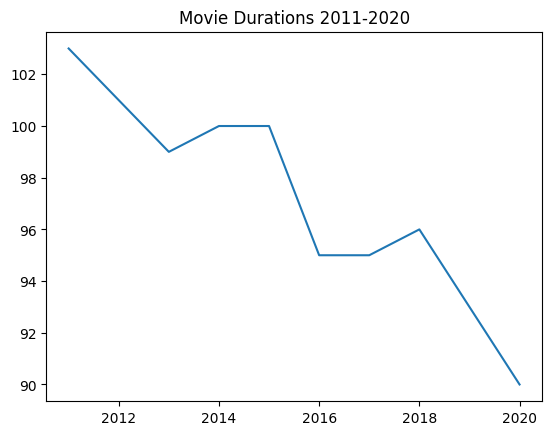

In [ ]:
#importing matplotlib.pyplot and creating a figure

import matplotlib.pyplot as plt

figure = plt.figure()

# plt.figure() function in Matplotlib is like preparing a blank canvas before you start drawing a picture.
# It helps you set up the size and other properties of the space where you'll create your plot or chart.
# you can use other functions like plt.plot() or plt.scatter() to add data and create your plots.

# now we're drawing a line plot using years and duratons, and offer it a title
plt.plot(years, durations)
plt.title("Movie Durations 2011-2020")

plt.show

**We'll be using the CSV file from GitHub here.**

Now we'll be creating another DataFrame. There's a lot of data here, so we'll be inspecting the first FIVE rows only right now.

In [ ]:
url = "https://github.com/qanhnn12/Investigating-Netflix-Movies-and-Guest-Stars-in-The-Office/raw/main/guided_project/datasets/netflix_data.csv"

# Read in the CSV as a DataFrame
netflix_df = pd.read_csv(url)

# Print the first five rows of the DataFrame
netflix_df[:5]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


Since we're working with movies specifically, we're gonna have to filter those out. DataFrame allows us to filter data quickly, and we can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.

In [ ]:
# subset the dataframe for the type "movie"

netflix_df_movies = netflix_df[netflix_df['type'] == 'Movie']

# now we'll select only the columns of interest

netflix_movies_interest = netflix_df_movies[['title','country', 'genre', 'release_year', 'duration']]

# again print the first five columns

netflix_movies_interest[:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.

For more information on how to create or work with a matplotlib figure, refer to the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).

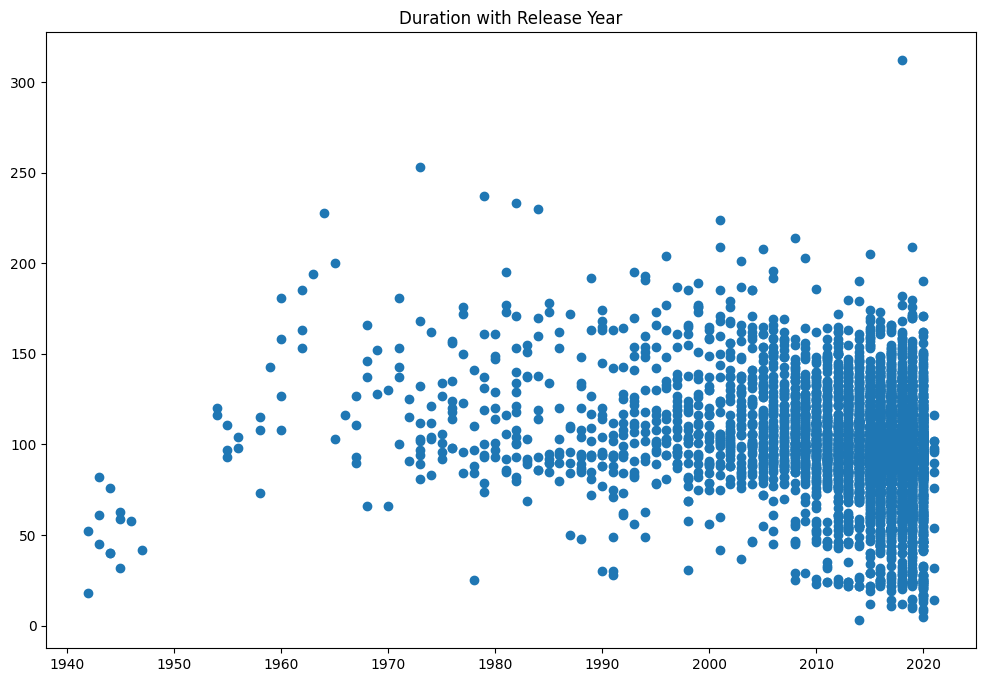

In [ ]:
# we're gonna use figsize to make the figure bigger

fig = plt.figure(figsize=(12,8))

# creating a scatter plot in a way very similar to line plot

plt.scatter(netflix_movies_interest['release_year'], netflix_movies_interest['duration'])

plt.title('Duration with Release Year')

plt.show()



Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [ ]:
# filtering out the movies to under 60 min

short_movies = netflix_movies_interest[netflix_movies_interest['duration'] < 60]

short_movies[:20]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again

In Python, there are many ways to explore the effect of these genres on our data, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column.

In [ ]:
colors = []

for index, row in netflix_movies_interest.iterrows():
  if row['genre'] == 'Children':
    colors.append('red')
  elif row['genre'] == 'Documentaries':
    colors.append('black')
  elif row['genre'] == 'Stand-Up':
    colors.append('green')
  else:
    colors.append('blue')

print(colors[0:10])

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'black']


We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

We'll also spruce up our plot with some additional axis labels and a new theme with plt.style.use(). You can find more information on customizing the style of your plot [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html)!

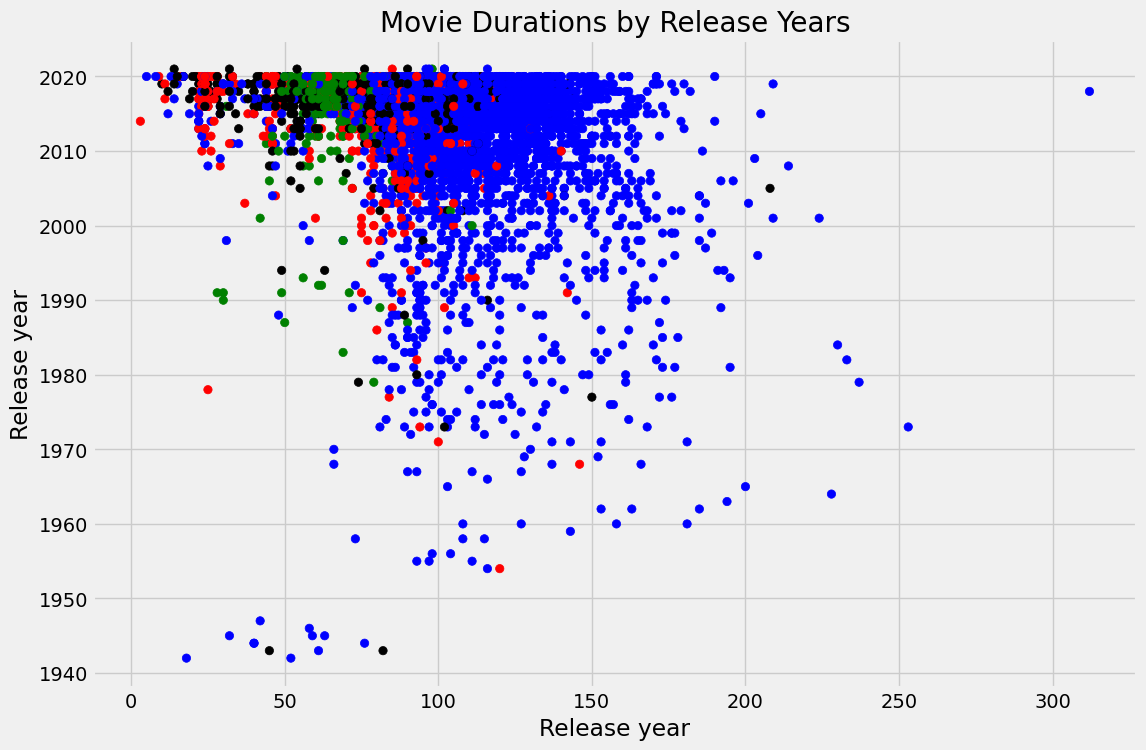

In [ ]:
# set a figure style and intialize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8))

# scatter plot duration:release_year

plt.scatter(netflix_movies_interest['duration'], netflix_movies_interest['release_year'], c = colors)

# create a title and axis labels

plt.title('Movie Durations by Release Years')
plt.ylabel("Release year")
plt.xlabel("Release year")

plt.show()